<a href="https://colab.research.google.com/github/sushmapathi/Movie-recomendation-project/blob/main/collab_filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import os
import re
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
movies_df=pd.read_csv('/content/movies.csv')
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movies_df=movies_df.dropna()
movies_df=movies_df.reset_index()
movies_df=movies_df[:9743]

In [ ]:
genres_1=list(movies_df['genres'])
genres_1[:5]

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy']

In [ ]:
Embeddings=embed(genres_1)
print("The embeded shape is:",Embeddings.shape)

The embeded shape is: (9742, 512)


In [ ]:
pca =PCA(n_components=2)
emb_2d=pca.fit_transform(Embeddings)

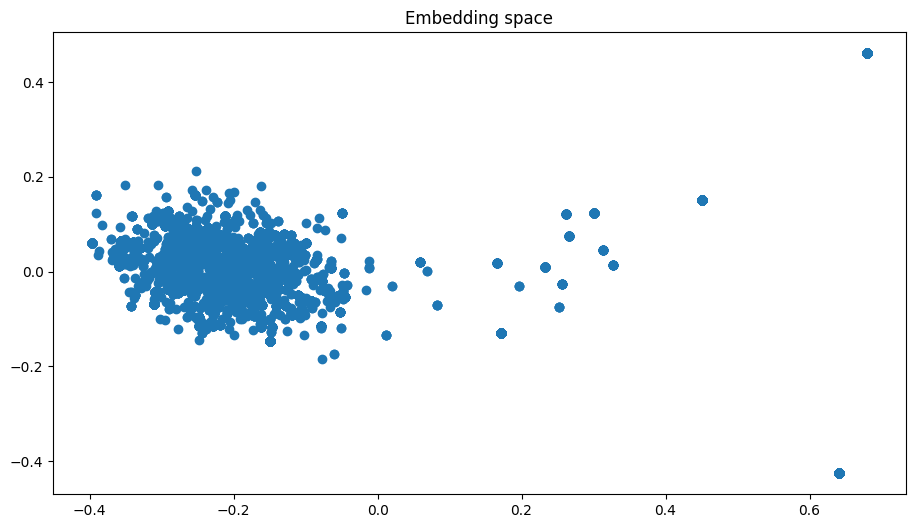

In [ ]:
plt.figure(figsize=(11,6))
plt.title('Embedding space')
plt.scatter(emb_2d[:,0],emb_2d[:,1])

In [ ]:
nn=NearestNeighbors(n_neighbors=10)
nn.fit(Embeddings)

NearestNeighbors(n_neighbors=10)

In [ ]:
def recommend(text):
    emb=embed([text])
    neighbors=nn.kneighbors(emb,return_distance=False)[0]
    return movies_df['title'].iloc[neighbors].tolist()

In [ ]:
print('recommend movies:')
recommend('Toystory')

recommend movies:


['Until the End of the World (Bis ans Ende der Welt) (1991)',
 'Philadelphia Experiment, The (1984)',
 'Guest from the Future (Gostya iz buduschego) (1985)',
 '2001: A Space Odyssey (1968)',
 'The Martian (2015)',
 'Enemy Mine (1985)',
 'Close Encounters of the Third Kind (1977)',
 'A.I. Artificial Intelligence (2001)',
 '20,000 Leagues Under the Sea (1954)',
 'Star Trek: Generations (1994)']